In this data science challenge, we are going to work on the fllowing taks:

1. Predict her country based on the numeric IP address. 

2. Predict whether an activity is fraudulent or not. 

3. Explain a used model to the client

(More detail is as in the email)

For this task we are assigned two datasets: Fraud_data and IPAddress_to_County.

Let's see how they look like.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_fraud = pd.read_csv("data/Fraud_Data.csv")
df_ip = pd.read_csv("data/IpAddress_to_Country.csv")

In [2]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


Here is the explanation:

"Fraud_Data" - information about each user first transaction

- user_id : Id of the user. Unique by user 
- signup_time : the time when the user created her account (GMT time)
- purchase_time : the time when the user bought the item (GMT time)
- purchase_value : the cost of the item purchased (USD) 
- device_id : the device id. You can assume that it is unique by device. I.e., transaJtions with the same device ID means that the same physical device was used to buy 
- source : user marketing channel: ads, SEO, Direct (i.e. came to the site by directly typing the site address on the browser). 
- browser : the browser used by the user.
- sex : user sex: Male/Female
- age : user age ip_address : user numeric ip address 
- class : this is what we are trying to predict: whether the activity was fraudulent (1) or not (0).

In [3]:
df_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


Here is the explanation:

"IpAddress_to_Country" - mapping each numeric ip address to its country. For each country, it gives a range. If the numeric ip address falls within the range, then the ip address belongs to the corresponding country. 

- lower_bound_ip_address : the lower bound of the numeric ip address for that country 
- upper_bound_ip_address : the upper bound of the numeric ip address for that country 
- country : the corresponding country. If a user has an ip address whose value is within the upper and lower bound, then she is based in this country.

# 1. Predict her country based on the numeric IP address.

We first build a model based on `df_ip`, and then predict country of each entity of `df_fraud`.

In [4]:
df_ip.shape

(138846, 3)

In [5]:
len(df_ip["country"].unique())

235

As you see above, each country may have more than one entity. We aggregate them into one entity for each country.

In [6]:
countries = df_ip["country"].unique()

ip_dict = dict()
for country in  countries:
    df = df_ip.loc[df_ip["country"] == country]
    ip_dict[country] = [(x[0], x[1]) for x in df.values]

Based on aggregated dictionary, we can determine whose ip address range given ip address belongs to.

In [7]:
def predict_country(ip):
    flag = False
    for key, value in ip_dict.items():
        for range_ in value:
            if range_[0] <= ip and range_[1] >= ip:
                flag = True
                country = key
                break
            if flag:
                break
    # Only when succeeded to find the country, return the name
    if flag:
        return country
    else:
        return "NAN"              

In [8]:
# Example
predict_country(16777472.0)

'China'

In [9]:
from joblib import Parallel, delayed

pred_country = Parallel(n_jobs=-1)(delayed(predict_country)(ip) for ip in df_fraud["ip_address"].values)

In [10]:
pred_country[:10]

['Japan',
 'United States',
 'United States',
 'NAN',
 'United States',
 'Canada',
 'NAN',
 'United States',
 'China',
 'United States']

In [11]:
len(set(pred_country))

182

In [12]:
df_fraud["country"] = pred_country

# 2. Predict whether an activity is fraudulent or not.

## Countries

In [13]:
fraud_ratio = dict()

for country in df_fraud["country"].unique():
    df = df_fraud.loc[df_fraud["country"].values == country]
    fraud_ratio[country] = df["class"].mean()

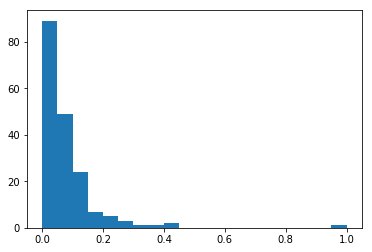

In [14]:
val = [x for x in fraud_ratio.values()]
plt.hist(val, bins=20);

In [15]:
sort_ratio = sorted(fraud_ratio.items(), key=lambda x: x[1], reverse=True)

In [16]:
sort_ratio

[('Turkmenistan', 1.0),
 ('Namibia', 0.43478260869565216),
 ('Sri Lanka', 0.41935483870967744),
 ('Luxembourg', 0.3888888888888889),
 ('Virgin Islands (U.S.)', 0.3333333333333333),
 ('Ecuador', 0.2641509433962264),
 ('Tunisia', 0.2627118644067797),
 ('Peru', 0.2605042016806723),
 ('Bolivia', 0.24528301886792453),
 ('Kuwait', 0.23333333333333334),
 ('Ireland', 0.22916666666666666),
 ('New Zealand', 0.22302158273381295),
 ('Uzbekistan', 0.2),
 ('Lithuania', 0.18947368421052632),
 ('Saudi Arabia', 0.1893939393939394),
 ('Malta', 0.18181818181818182),
 ("Cote D'ivoire", 0.16666666666666666),
 ('Afghanistan', 0.16666666666666666),
 ('Denmark', 0.15918367346938775),
 ('Chile', 0.15347721822541965),
 ('Greece', 0.14285714285714285),
 ('Malawi', 0.14285714285714285),
 ('Montenegro', 0.14285714285714285),
 ('United Arab Emirates', 0.14035087719298245),
 ('Belgium', 0.13691931540342298),
 ('Egypt', 0.13370473537604458),
 ('Costa Rica', 0.13333333333333333),
 ('Armenia', 0.13333333333333333),
 ('

If we map countries to one hot encoding, dimension gets too large. 

You may thing this fraud ratio can be used as a feature. Actually, this feature is made after looking at label, which leads to overfitting. In this analysis, we just ommit this values. 

## Categorical Variables

In [17]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import scipy

features = dict()

def create_onehot(name, X):
    features = dict()
    num_features = len(np.unique(X))
    if num_features == 1:
        features[name] = X
    else:
        label = LabelEncoder()
        onehot = OneHotEncoder(n_values=num_features)
        num_val = label.fit_transform(X)[:, None]
        one_hot_feature = onehot.fit_transform(num_val)
        for i in range(num_features):
            features[name + "_" + str(label.classes_[i])] = one_hot_feature[:, [i]]
    return features

def df_to_onehot(name, df):
    if name not in df:
        raise ValueError()
    return create_onehot(name, df[name].values)

def dict_to_array(dict_X):
    vals = []
    for key, val in dict_X.items():
        vals.append(val)
    return scipy.sparse.hstack(vals)

In [18]:
print("# instance=", df_fraud.shape[0])
print("# user_id=", len(df_fraud["user_id"].unique()))
print("# device_id=", len(df_fraud["device_id"].unique()))
print("# source=", len(df_fraud["source"].unique()))
print("# browser", len(df_fraud["browser"].unique()))
print("# sex=", len(df_fraud["sex"].unique()))

# instance= 151112
# user_id= 151112
# device_id= 137956
# source= 3
# browser 5
# sex= 2


Since `user_id` is unique to each instance, we get rid of it from data.
For `device_id`, we see some overlap. We may check if device id is used for fraud in the past. 

Instead, we use PCA after one-hot encoded.

In [19]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,NAN
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [20]:
features.update(df_to_onehot("country", df_fraud))
features.update(df_to_onehot("source", df_fraud))
features.update(df_to_onehot("browser", df_fraud))
features.update(df_to_onehot("sex", df_fraud))

## TimeStamps

Next we consider timestamp variables.

In [23]:
print("min signup_time=", df_fraud["signup_time"].min())
print("max signup_time=", df_fraud["signup_time"].max())
print("min purchase_time=", df_fraud["purchase_time"].min())
print("max purchase_time=", df_fraud["purchase_time"].max())

min signup_time= 2015-01-01 00:00:42
max signup_time= 2015-08-18 04:40:29
min purchase_time= 2015-01-01 00:00:44
max purchase_time= 2015-12-16 02:56:05


Since we have data only for one year, we consider hour and month time frameworks.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

signup_df = pd.DataFrame(df_fraud.values, columns=df_fraud.columns,
                         index=pd.DatetimeIndex(df_fraud["signup_time"].values))
purchase_df = pd.DataFrame(df_fraud.values, columns=df_fraud.columns,
                           index=pd.DatetimeIndex(df_fraud["purchase_time"].values))

### Month

/home/tomoaki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


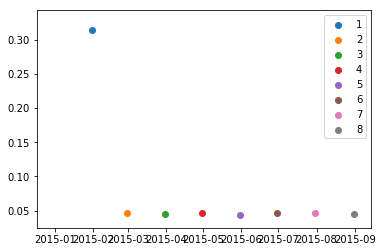

In [25]:
for x, y in signup_df.groupby(pd.TimeGrouper("M")):
    # print(y.dropna().shape[0])
    fraud_y = y.loc[y["class"] == 1]
    ratio = fraud_y.shape[0] / y.shape[0]
    plt.scatter(x, ratio, label=x.month)
plt.legend()

/home/tomoaki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


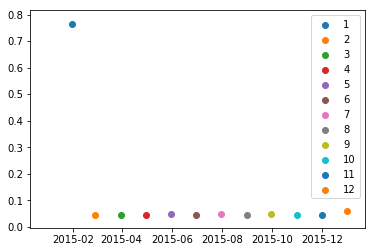

In [26]:
for x, y in purchase_df.groupby(pd.TimeGrouper("M")):
    fraud_y = y.loc[y["class"] == 1]
    ratio = fraud_y.shape[0] / y.shape[0]
    plt.scatter(x, ratio, label=x.month)
plt.legend()

We can see that January registration and purchase is highly likely fraud.

## Hour

In [27]:
from datetime import datetime

def convert_time(x):  
    x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return x.strftime("%H:%M:%S")

def convert_times(xs):  
    xs = [convert_time(x) for x in xs]
    return xs

In [28]:
signup_df = pd.DataFrame(df_fraud.values, columns=df_fraud.columns,
                         index=pd.DatetimeIndex(convert_times(df_fraud["signup_time"].values)))
purchase_df = pd.DataFrame(df_fraud.values, columns=df_fraud.columns,
                           index=pd.DatetimeIndex(convert_times(df_fraud["purchase_time"].values)))

/home/tomoaki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
/home/tomoaki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


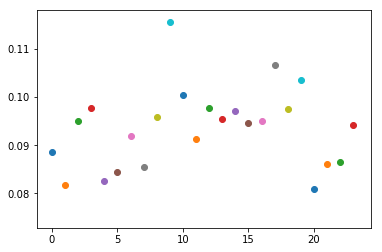

In [29]:
for x, y in signup_df.groupby(pd.TimeGrouper("H")):
    fraud_y = y.loc[y["class"] == 1]
    ratio = fraud_y.shape[0] / y.shape[0]
    plt.scatter(x.hour, ratio)
plt.legend()

/home/tomoaki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.
/home/tomoaki/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


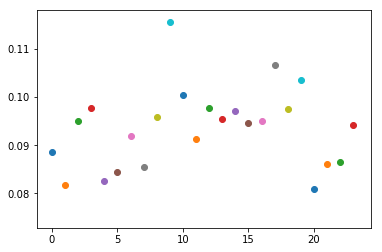

In [30]:
for x, y in signup_df.groupby(pd.TimeGrouper("H")):
    fraud_y = y.loc[y["class"] == 1]
    ratio = fraud_y.shape[0] / y.shape[0]
    plt.scatter(x.hour, ratio)
plt.legend()

For the hourly time frameworks, we do not see the significant trend

As a timestamp feature, we use binary value about if timestamp is January or not. 

In [31]:
def string_to_month(x):  
    x = datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    return str(x.month)

def create_month_feature(name, X):
    X = [string_to_month(x_i) for x_i in X]
    return create_onehot(name, X)

In [32]:
features.update(create_month_feature("purchase_time", df_fraud["purchase_time"].values))

Sum up all of the preprocessing functions above.

In [42]:
def preprocess(df):
    df = df.copy()
    features = dict()
    # One hot encoding
    features.update(df_to_onehot("country", df))
    features.update(df_to_onehot("source", df))
    features.update(df_to_onehot("browser", df))
    features.update(df_to_onehot("sex", df))
    
    # Time stamp
    features.update(create_month_feature("purchase_time", df["purchase_time"].values))
    
    return features

Next, we build an estimator. The number of fraud label is much smaller than that of usual transaction. Even if we make a estimator that always returns negative,  we are able to achieve good accuracy score. It is difficult to learn how to predict positive label directly.

Then, we introduce imbalance learning. We use [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html) for implementation. 

In [66]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MaxAbsScaler


class FraudEstimator(xgb.XGBClassifier):
    def __init__(self, max_depth=3, learning_rate=0.1,
                 n_estimators=100, silent=True,
                 objective='binary:logistic',
                 n_jobs=-1, gamma=0, min_child_weight=1,
                 max_delta_step=0, subsample=1,
                 colsample_bytree=1, colsample_bylevel=1,
                 reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                 base_score=0.5, random_state=0, missing=np.nan,
                 n_components=0.5, ratio=2.0, **kwargs):
        self.n_components = n_components
        self.ratio = ratio
        super().__init__(max_depth=max_depth, learning_rate=learning_rate,
                         n_estimators=n_estimators, silent=silent,
                         objective=objective, nthread=None, n_jobs=n_jobs,
                         gamma=gamma, min_child_weight=min_child_weight,
                         max_delta_step=max_delta_step, subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         colsample_bylevel=colsample_bylevel,
                         reg_alpha=reg_alpha, reg_lambda=reg_lambda,
                         scale_pos_weight=scale_pos_weight,
                         base_score=base_score, random_state=random_state,
                         seed=None, missing=missing, **kwargs)

    
    def fit(self, df, y, *args, **kwargs):
        # Preprocessing
        features = preprocess(df)
        features_array = dict_to_array(features)
        # Need scaling before PCA
        self.scaler = MaxAbsScaler()
        features_array = self.scaler.fit_transform(features_array)
        # Transform from float ratio to integer number
        num_dim = features_array.shape[1]
        n_components = max(1, int(self.n_components * num_dim))
        self.pca = TruncatedSVD(n_components)
        X = self.pca.fit_transform(features_array)
        # Over Sampling
        num_positive = np.mean(y) * len(X)
        num_samples = int(num_positive * self.ratio)
        X_resampled, y_resampled = SMOTE(ratio={1:num_samples}).fit_sample(X, y)
        return super().fit(X_resampled, y_resampled, *args, **kwargs)
        
    def _preprocess(self, df, *args, **kwargs):
        # Preprocessing
        features = preprocess(df)
        features_array = dict_to_array(features)
        features_array = scaler.fit_transform(features_array)
        features_array = self.scaler.fit_transform(features_array)
        X = self.pca.fit_transform(features_array)
        return X
    
    def predict(self, df, *args, **kwargs):
        X = self._preprocess(df)
        return super().predict(X, *args, **kwargs)
    
    def predict_proba(self, df, *args, **kwargs):
        X = self._preprocess(df)
        return super().predict_proba(X, *args, **kwargs)

In [35]:
import xgboost as xgb
from imblearn.over_sampling import SMOTE

y = df_fraud["class"].values
clf = FraudEstimator(n_jobs=-1)
clf.fit(df_fraud, y)

FraudEstimator(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
        gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
        min_child_weight=1, missing=None, n_components=0.5,
        n_estimators=100, n_jobs=-1, objective='binary:logistic',
        random_state=0, ratio=2.0, reg_alpha=0, reg_lambda=1,
        scale_pos_weight=1, silent=True, subsample=1)

In [36]:
clf.predict(df_fraud)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0, 0, 1, ..., 0, 0, 0])

### Cost function

In this setting, while false positive requires the client to deal with customers' query of false alarm, false negative let scams to steal money. 

Thus, cost function will be determined by the trade-off between labor cost of false alarm and stolen money. 
For the sake of simplicity we assume that both of them can be defined as constant value as L and S. In this case, we minimize the following cost: 

$$Cost = (\# False Positive \times L + \# False Negative \times S) / \# Entire data $$


In this notebook, we assume that $L=10$ and $S=1$.

Finally, we consider hyperparameter optimization. Hyperparameters here include that of xgboost and ratio of oversampling. I implemented Bayesian optimization in [this repository](https://github.com/jjakimoto/BBOptimizer). 

In [43]:
y = df_fraud["class"].values
num_data = df_fraud.shape[0]
train_idx = int(0.8 * num_data)
df_train = df_fraud[:train_idx]
y_train = y[:train_idx]
df_valid = df_fraud[train_idx:]
y_valid = y[train_idx:]

In [55]:
from copy import deepcopy
from sklearn.model_selection import StratifiedKFold

params_conf = [
        {"name": "n_componenets", "domain": (1e-2, 1.),
         "type": "continuous", "scale": "log"},
        {'name': 'n_estimators', 'domain': (1, 1e3),
          'type': 'integer', 'scale': 'log'},
         {'name': 'learning_rate', 'domain': (1e-3, 10.),
          'type': 'continuous', 'scale': 'log'},
         {'name': 'reg_alpha', 'domain': (1e-8, 1e1),
          'type': 'continuous', 'scale': 'log'},
         {'name': 'reg_lambda', 'domain': (1e-8, 1e1),
          'type': 'continuous', 'scale': 'log'}, 
         {'name': 'ratio',  'type': 'integer', 'domain': (1, 20)}
]

def cost_func(y, y_pred):
    pos_pred = y_pred[y==1]
    neg_pred = y_pred[y==0]
    false_negative = len(pos_pred) - np.sum(pos_pred)
    false_positive = np.sum(neg_pred)
    return (10 * false_negative + 1.0 * false_positive) / len(y)


def score_func(params):
    scores = []
    skf = StratifiedKFold(n_splits=5)
    for train_index, test_index in skf.split(df_train.values, y_train):
        params = deepcopy(params)
        clf = FraudEstimator(n_jobs=-1, **params)
        clf.fit(df_train.iloc[train_index], y_train[train_index])
        pred = clf.predict(df_train.iloc[test_index])
        score = cost_func(y_train[test_index], pred)
        scores.append(score)
    score = np.mean(scores)
    # print(params, score)
    return score

In [56]:
import random
import numpy as np
from bboptimizer import Optimizer

np.random.seed(0)
random.seed(0)
bayes_opt = Optimizer(score_func, params_conf, sampler="bayes", r_min=10, maximize=False)
results = bayes_opt.search(num_iter=100)
print("********************results*****************")
print(results)







  0%|          | 0/100 [00:00<?, ?it/s]





  1%|          | 1/100 [03:10<5:13:38, 190.09s/it]





  2%|▏         | 2/100 [03:53<3:58:41, 146.14s/it]





  3%|▎         | 3/100 [14:30<7:54:01, 293.21s/it]





  4%|▍         | 4/100 [18:26<7:22:06, 276.32s/it]





  5%|▌         | 5/100 [22:54<7:13:07, 273.56s/it]





  6%|▌         | 6/100 [23:41<5:22:11, 205.65s/it]





  7%|▋         | 7/100 [24:39<4:10:11, 161.42s/it]





  8%|▊         | 8/100 [25:24<3:13:51, 126.43s/it]





  9%|▉         | 9/100 [30:02<4:20:42, 171.89s/it]





 10%|█         | 10/100 [35:41<5:33:05, 222.06s/it]





 11%|█         | 11/100 [36:48<4:20:36, 175.69s/it]





 12%|█▏        | 12/100 [37:31<3:19:04, 135.74s/it]





 13%|█▎        | 13/100 [38:08<2:33:53, 106.14s/it]





 14%|█▍        | 14/100 [46:50<5:30:46, 230.78s/it]





 15%|█▌        | 15/100 [47:26<4:04:10, 172.36s/it]





 16%|█▌        | 16/100 [48:01<3:03:47, 131.28s/it]





 17%|█▋        | 17/100 [48:37<2:22:01, 102.67

********************results*****************
({'n_componenets': 1.0, 'n_estimators': 1, 'learning_rate': 0.001, 'reg_alpha': 0.0001664165990949194, 'reg_lambda': 0.00018284667763744585, 'ratio': 2}, 0.48313719956758316)


We also found the optimal set of hyperparameters!

### Score

In [69]:
clf = FraudEstimator(n_jobs=-1, **results[0])
clf.fit(df_train, y_train)
proba = clf.predict_proba(df_valid)[:, 1]
predict = clf.predict(df_valid)

In [77]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,\
    f1_score, accuracy_score

fpr, tpr, thresholds = roc_curve(y_valid, proba)
roc_auc = roc_auc_score(y_valid, proba)
f1 = f1_score(y_valid, predict)
accuracy = accuracy_score(y_valid, predict)

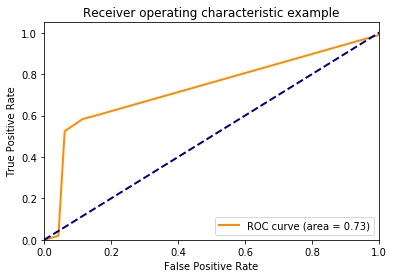

In [76]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [80]:
print("Accuracy = %f" % accuracy)
print("F1 = %f" % f1)
print("AUC = %f" % roc_auc)

Accuracy = 0.856103
F1 = 0.435268
AUC = 0.730571


# 3. Explain a used model to the client

Gradient boost improves the performance by aggregating many Decision Trees.

Decision Tree classifies determines threshold to classify data into some categories. For example, let's assume that there is a correlation between cancer and height. After looking at data, you may find that people over certain N feet are more likely to get cancer. Decision Tree determines this number N by looking at data.  

Gradient boost aggregate multiple Decision Trees to determines more complex rules to classify data. For example, assume that you find that the relation between cancer and height might not be that simple. The cancer may have relation with square of height or some other complex expression. In that case, you need to add other trees to cover the part, which is not preditable by a simple tree.

By adding more trees, Gradient boost outperforms simple Decision Tree.